/tmp/ipython-input-717741207.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Age'].fillna(train['Age'].median(), inplace=True)  # Fill Age with median
/tmp/ipython-input-717741207.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].meth

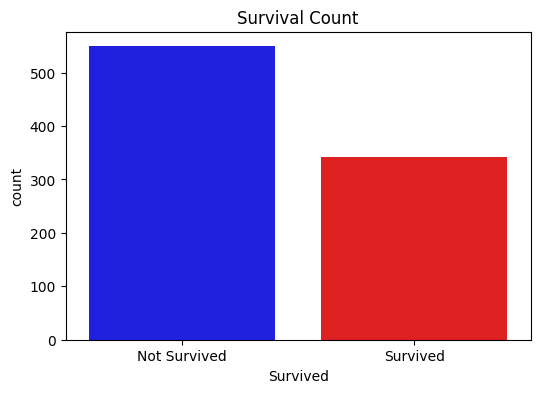

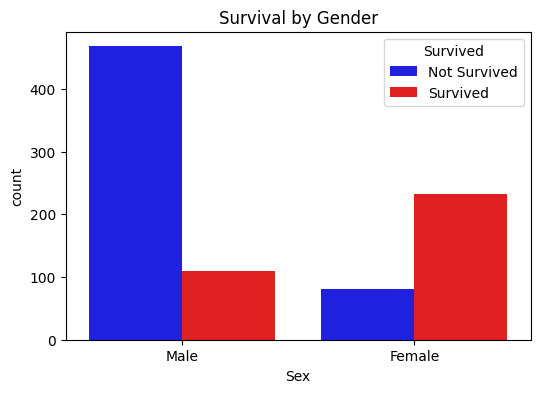

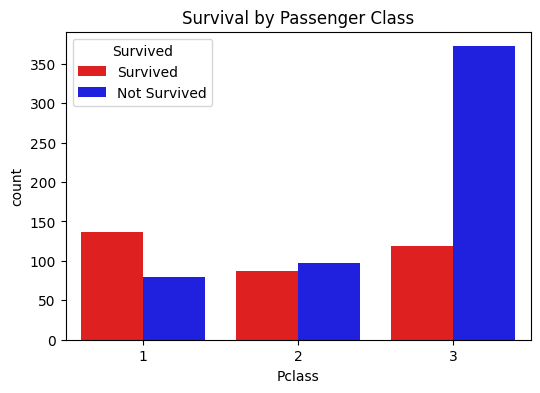

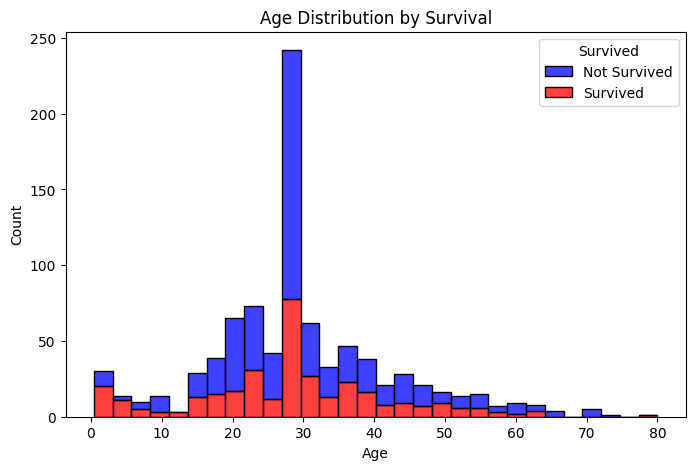

/tmp/ipython-input-717741207.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Survived', y='Age', data=train, palette={'Survived':'red', 'Not Survived':'blue'})


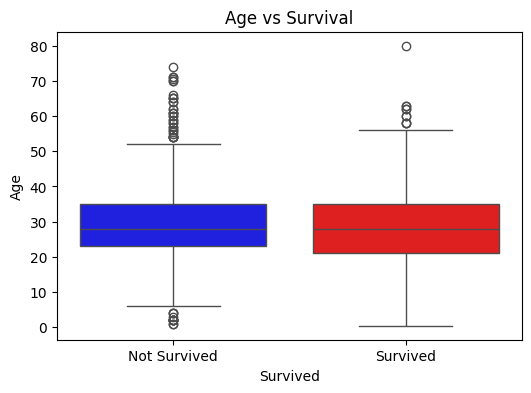

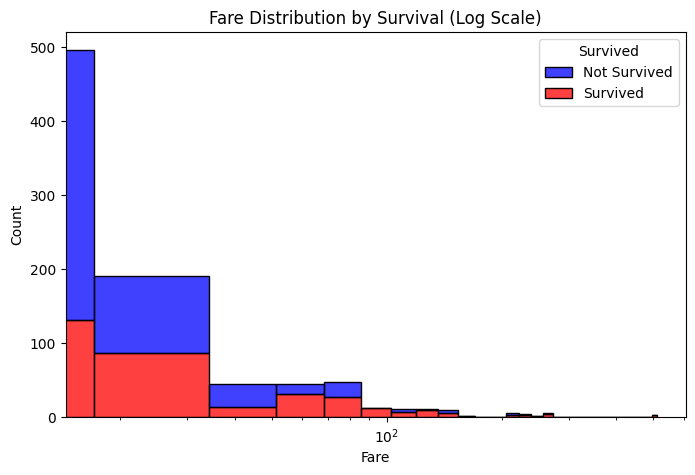

/tmp/ipython-input-717741207.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Survived', y='Fare', data=train, palette={'Survived':'red', 'Not Survived':'blue'})


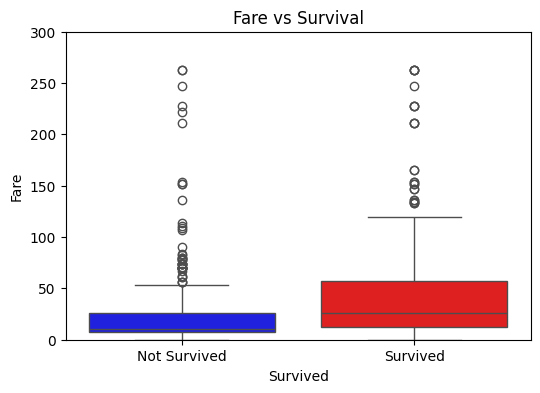

In [5]:
# Titanic Data Analysis - Cleaned and Well Commented

# Step 0: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load Dataset
train = pd.read_csv("train.csv")

# Step 2: Handle Missing Values
train.drop(columns=['Cabin'], inplace=True)  # Cabin has too many missing values
train['Age'].fillna(train['Age'].median(), inplace=True)  # Fill Age with median
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)  # Fill Embarked with mode

# Step 3: Drop Unnecessary Columns
train.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)

# Step 4: Encode Categorical Variables
# Sex column: male=0, female=1
train['Sex'] = train['Sex'].map({'male': 'male', 'female': 'female'})

# Embarked column: One-hot encoding, drop first to avoid dummy variable trap
train = pd.get_dummies(train, columns=['Embarked'], drop_first=True)

# Step 5: Ensure all columns are numeric
train['Embarked_Q'] = train['Embarked_Q'].astype(int)
train['Embarked_S'] = train['Embarked_S'].astype(int)

# Step 6: Map Survived to string for better visualization
train['Survived'] = train['Survived'].map({0: 'Not Survived', 1: 'Survived'})

# =========================
# Step 7: EDA Plots
# =========================

# 1️⃣ Survival Count
plt.figure(figsize=(6,4))
sns.countplot(x='Survived', data=train, palette={'Survived':'red', 'Not Survived':'blue'})
plt.title("Survival Count")
plt.show()

# 2️⃣ Survival vs Gender
plt.figure(figsize=(6,4))
sns.countplot(x='Sex', hue='Survived', data=train, palette={'Survived':'red', 'Not Survived':'blue'})
plt.title("Survival by Gender")
plt.xticks([0,1], ['Male','Female'])  # Optional: make x-axis labels clear
plt.show()

# 3️⃣ Survival vs Passenger Class
plt.figure(figsize=(6,4))
sns.countplot(x='Pclass', hue='Survived', data=train, palette={'Survived':'red', 'Not Survived':'blue'})
plt.title("Survival by Passenger Class")
plt.show()

# 4️⃣ Age Distribution by Survival
plt.figure(figsize=(8,5))
sns.histplot(data=train, x='Age', hue='Survived', multiple='stack', bins=30,
             palette={'Survived':'red', 'Not Survived':'blue'})
plt.title("Age Distribution by Survival")
plt.show()

# 5️⃣ Age vs Survival (Boxplot)
plt.figure(figsize=(6,4))
sns.boxplot(x='Survived', y='Age', data=train, palette={'Survived':'red', 'Not Survived':'blue'})
plt.title("Age vs Survival")
plt.show()

# 6️⃣ Fare Distribution by Survival
plt.figure(figsize=(8,5))
sns.histplot(data=train, x='Fare', hue='Survived', multiple='stack', bins=30,
             palette={'Survived':'red', 'Not Survived':'blue'})
plt.xscale('log')  # Apply log scale to reduce skewness
plt.title("Fare Distribution by Survival (Log Scale)")
plt.show()

# 7️⃣ Fare vs Survival (Boxplot)
plt.figure(figsize=(6,4))
sns.boxplot(x='Survived', y='Fare', data=train, palette={'Survived':'red', 'Not Survived':'blue'})
plt.ylim(0, 300)  # Optional: limit extreme outliers
plt.title("Fare vs Survival")
plt.show()
